In [1]:
import sys
import os
import numpy as np
import matplotlib
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
# basins = ["california"]


0
1
2
3
4


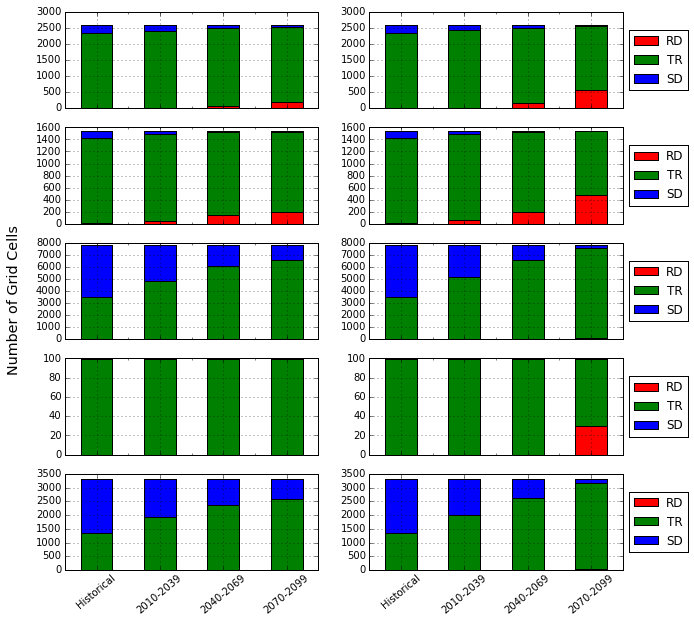

In [9]:
basins = ["cascades","california","northernrockies","whites","southernrockies"]
colors = ['r','g','b','c','y']
count = 0
# fig = plt.figure(figsize=(20,20))
fig, axes = plt.subplots(figsize=(10,10),nrows=5, ncols=2)
fs = 10
lw = 2.0
num = 0
for basin in basins: 
    ## get data
    ## historical
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"historical")
    data = np.load(file)
    temp_avg_hist = data['temp_avg']
    precip_hist = data['precip']
    swe_hist = data['swe']
    ## rcp4.5
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp45")
    data = np.load(file)
    swe_2010_2039_rcp45 = data['swe_2010_2039']
    swe_2040_2069_rcp45 = data['swe_2040_2069']
    swe_2070_2099_rcp45 = data['swe_2070_2099']
    temp_avg_2010_2039_rcp45 = data['temp_avg_2010_2039']
    temp_avg_2040_2069_rcp45 = data['temp_avg_2040_2069']
    temp_avg_2070_2099_rcp45 = data['temp_avg_2070_2099']
    ## rcp8.5
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp85")
    data = np.load(file)
    swe_2010_2039_rcp85 = data['swe_2010_2039']
    swe_2040_2069_rcp85 = data['swe_2040_2069']
    swe_2070_2099_rcp85 = data['swe_2070_2099']
    temp_avg_2010_2039_rcp85 = data['temp_avg_2010_2039']
    temp_avg_2040_2069_rcp85 = data['temp_avg_2040_2069']
    temp_avg_2070_2099_rcp85 = data['temp_avg_2070_2099']
    ####################### bin by temperature and change classification in the future ############################
    ## hist class
    ## snow dominant
    rd_cut = 278.15
    sd_cut = 267.15
    swe_sd_hist = swe_hist[temp_avg_hist <= sd_cut]
    ## transient
    swe_tr_hist = swe_hist[(temp_avg_hist > sd_cut) & (temp_avg_hist < rd_cut)]
    ## rain dominant
    swe_rd_hist = swe_hist[temp_avg_hist >= rd_cut]

    ## rcp45
    ## snow dominant
    swe_sd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 <= sd_cut]
    swe_sd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 <= sd_cut]
    swe_sd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 <= sd_cut]

    ## transient
    swe_tr_2010_2039_rcp45 = swe_2010_2039_rcp45[(temp_avg_2010_2039_rcp45 > sd_cut) & (temp_avg_2010_2039_rcp45 < rd_cut)]
    swe_tr_2040_2069_rcp45 = swe_2040_2069_rcp45[(temp_avg_2040_2069_rcp45 > sd_cut) & (temp_avg_2040_2069_rcp45 < rd_cut)]
    swe_tr_2070_2099_rcp45 = swe_2070_2099_rcp45[(temp_avg_2070_2099_rcp45 > sd_cut) & (temp_avg_2070_2099_rcp45 < rd_cut)]


    ## rain dominant
    swe_rd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 >= rd_cut]
    swe_rd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 >= rd_cut]
    swe_rd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 >= rd_cut]


    ## rcp85
    ## snow dominant
    swe_sd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 <= sd_cut]
    swe_sd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 <= sd_cut]
    swe_sd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 <= sd_cut]
    ## transient
    swe_tr_2010_2039_rcp85 = swe_2010_2039_rcp85[(temp_avg_2010_2039_rcp85 > sd_cut) & (temp_avg_2010_2039_rcp85 < rd_cut)]
    swe_tr_2040_2069_rcp85 = swe_2040_2069_rcp85[(temp_avg_2040_2069_rcp85 > sd_cut) & (temp_avg_2040_2069_rcp85 < rd_cut)]
    swe_tr_2070_2099_rcp85 = swe_2070_2099_rcp85[(temp_avg_2070_2099_rcp85 > sd_cut) & (temp_avg_2070_2099_rcp85 < rd_cut)]

    ## rain dominant
    swe_rd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 >= rd_cut]
    swe_rd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 >= rd_cut]
    swe_rd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 >= rd_cut]


    ################################################### BAR GRAPH #####################################################
    ## RD, TR, SD 
    # ax[num+1] = fig.add_subplot(5,2,num + 1)
    df1 = pd.DataFrame([[len(swe_rd_hist),len(swe_tr_hist),len(swe_sd_hist)],
                       [len(swe_rd_2010_2039_rcp45),len(swe_tr_2010_2039_rcp45),len(swe_sd_2010_2039_rcp45)],
                       [len(swe_rd_2040_2069_rcp45),len(swe_tr_2040_2069_rcp45),len(swe_sd_2040_2069_rcp45)],
                       [len(swe_rd_2070_2099_rcp45),len(swe_tr_2070_2099_rcp45),len(swe_sd_2070_2099_rcp45)]], 
                      columns = ['RD','TR','SD'])
    # df1.plot(ax=ax[num+1],kind = 'bar', stacked=True)
    ax1 = df1.plot(kind = 'bar', stacked=True,ax=axes[num,0],color=['r', 'g', 'b'],legend=False)
    x = [0,1,2,3]
    xlabels = ['Historical','2010-2039','2040-2069','2070-2099']
    ax1.set_xticks(x)
    ax1.set_xticklabels(xlabels, rotation=40)
    
    
    # ax[num+1] = fig.add_subplot(5,2,num + 1)
    df2 = pd.DataFrame([[len(swe_rd_hist),len(swe_tr_hist),len(swe_sd_hist)],
                       [len(swe_rd_2010_2039_rcp85),len(swe_tr_2010_2039_rcp85),len(swe_sd_2010_2039_rcp85)],
                       [len(swe_rd_2040_2069_rcp85),len(swe_tr_2040_2069_rcp85),len(swe_sd_2040_2069_rcp85)],
                       [len(swe_rd_2070_2099_rcp85),len(swe_tr_2070_2099_rcp85),len(swe_sd_2070_2099_rcp85)]], 
                      columns = ['RD','TR','SD'])
    # df2.plot(ax=ax[num+1],kind = 'bar', stacked=True)
    ax = df2.plot(kind = 'bar', stacked=True, ax=axes[num,1],color=['r', 'g', 'b'],legend=False)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    x = [0,1,2,3]
    xlabels = ['Historical','2010-2039','2040-2069','2070-2099']
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=40)
    print(num)
    num += 1
# fig.legend([line1, line2], ['yep', 'nope'], bbox_to_anchor=[0.5, 0.5], loc='center', ncol=2)
fig.text(0.045, 0.5, 'Number of Grid Cells', va='center', rotation='vertical',size = 'x-large')
plt.show()

saving figure to '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/changeclass/RD_TR_SD_ternary'


/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


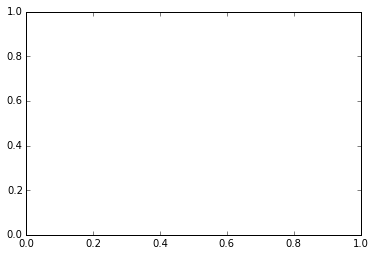

In [3]:
plt.legend(loc='lower left',prop={'size':15},bbox_to_anchor=(1, 0.5))
fig.text(0.5, 0.05, 'SWE (mm)', va='center', rotation='horizontal',size = 'x-large')
fig.text(0.075, 0.5, 'Probability', va='center', rotation='vertical',size = 'x-large')
## save plot
plotname = 'RD_TR_SD_ternary' 
direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/changeclass/'
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" %savepath)
plt.savefig(savepath)